# OpenCV
**Prerequisite:** Before starting this exercise, you should make yourself familiar with Python and some necessary library, e.g., numpy, matplotlib, etc. One good tutorial can be found [here](http://cs231n.github.io/python-numpy-tutorial/).

In this exercise you will:
* Learn about some basic image processing operations with OpenCV.
* Re-implement some basic image processing operations. This will help you to
 * Have better understand about the image processing operations.
 * Practice Python programming with Numpy library.

In [14]:
import cv2
import numpy as np
import sys
import matplotlib
from matplotlib import pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [15]:
def rel_error(out, correct_out):
    return np.sum(abs(out.astype(np.float32) - correct_out.astype(np.float32)) / 
                          (abs(out.astype(np.float32)) + abs(correct_out.astype(np.float32))))

In [16]:
# Checking OpenCV version
cv2.__version__

'4.2.0'

### NOTICE: 
In this lab exercise, we recommend to use `OpenCV 3.x` version, the documentations for OpenCV API can be found [here](https://docs.opencv.org/3.0-beta/index.html).

## Load images
Use the function [cv2.imread()](https://docs.opencv.org/3.0-beta/modules/imgcodecs/doc/reading_and_writing_images.html?highlight=cv2.imread#cv2.imread) to read an image. The image should be in the working directory or a full path of image should be given. The function will return a numpy matrix.

Second argument is a flag which specifies the way image should be read.

 * cv2.IMREAD_COLOR - (1): Loads a color image. Any transparency (alpha channel) of image will be neglected. It is the **default flag**.
 * cv2.IMREAD_GRAYSCALE - (0): Loads image in grayscale mode
 * cv2.IMREAD_UNCHANGED - (-1): Loads image as such including alpha channel, if included.
 
**NOTE**: Color image loaded by OpenCV is in *Blue-Green-Red (BGR)* mode. But Matplotlib displays in *RGB* mode. So color images will not be displayed correctly in Matplotlib if image is read with OpenCV. We will discuss how to handle to display properly later.

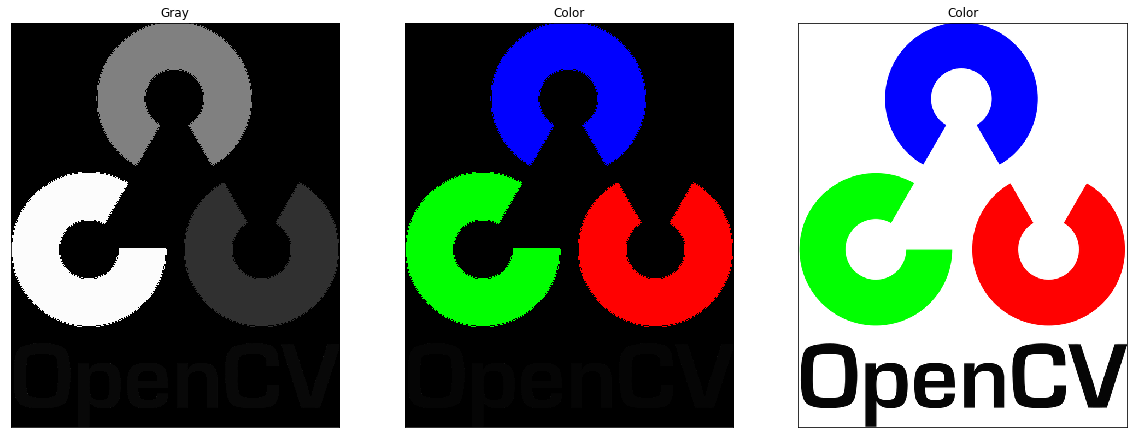

In [17]:
img_gray = cv2.imread('imgs/opencv_logo.png', 0)

plt.figure(figsize=(20,10))
plt.subplot(131),
plt.imshow(img_gray, cmap='gray')  # include cmap='gray' to display gray image
plt.title('Gray'),plt.xticks([]), plt.yticks([])

img_color1= cv2.imread('imgs/opencv_logo.png', 1)
plt.subplot(132),plt.imshow(img_color1),
plt.title('Color'),plt.xticks([]), plt.yticks([])

img_color2= cv2.imread('imgs/opencv_logo.png',-1)
plt.subplot(133),plt.imshow(img_color2),
plt.title('Color'),plt.xticks([]), plt.yticks([])
plt.show()

**Question:** How many channels for each image: img_gray, img_color1, img_color2?

**Your answer**: 
* img_gray:
* img_color1:
* img_color2:

# Transformations
## Scaling
Resize image using the function [cv2.resize](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/geometric_transformations.html?highlight=cv2.resize#cv2.resize).

In [18]:
# Get list of available flags
flags = [i for i in dir(cv2) if i.startswith('INTER_')]
print (flags)

['INTER_AREA', 'INTER_BITS', 'INTER_BITS2', 'INTER_CUBIC', 'INTER_LANCZOS4', 'INTER_LINEAR', 'INTER_LINEAR_EXACT', 'INTER_MAX', 'INTER_NEAREST', 'INTER_TAB_SIZE', 'INTER_TAB_SIZE2']


(378, 428, 3)
(756, 856, 3)
(500, 566, 3)
1.1322751322751323 1.132


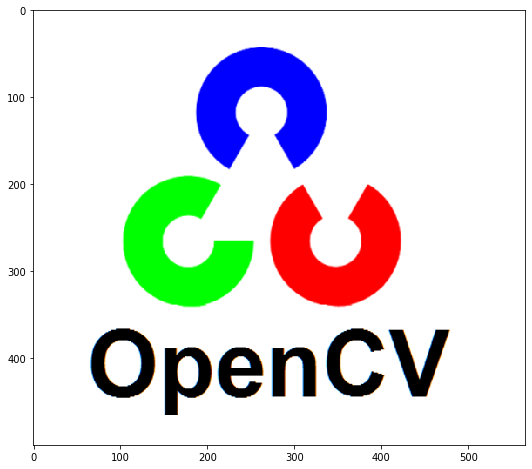

In [19]:
img = cv2.imread('imgs/opencv_logo1.png', 1)
res = cv2.resize(img,None,fx=2.0, fy=2.0, interpolation = cv2.INTER_CUBIC)
#OR
height, width = img.shape[:2]
res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)

################################################################################
# TO DO: Check the size of 'img' and 'res'?
################################################################################
pass
print(img.shape)
print(res.shape)
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

################################################################################
# TO DO: Resize 'img' so as to the smaller side is 500, while keeping image 
# ration unchanged.
x = (500/378)
img2 = cv2.resize(img,(int(x*width),int(x*height)),interpolation =cv2.INTER_CUBIC)
print(img2.shape)
#plt.imshow(img)
plt.imshow(img2)
print(width/height,566/500)
################################################################################
pass
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

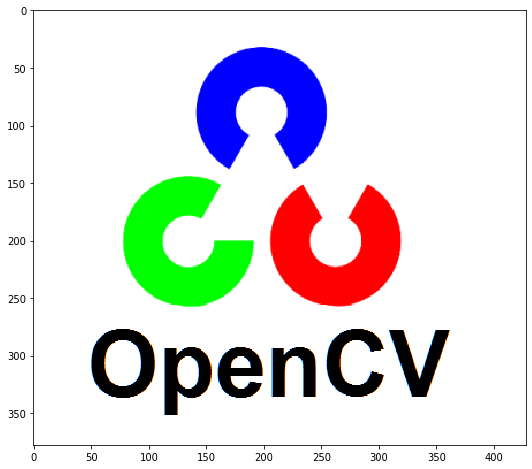

In [20]:
plt.imshow(img)

## Translation
Translation is the shifting of object's location. If you know the shift in $(x,y)$ direction, let it be $(t_x,t_y)$, you can create the transformation matrix $M$ as follows:

$$M = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \end{bmatrix}$$
You can take make it into a Numpy array of type **np.float32** and pass it into [cv2.warpAffine()](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/geometric_transformations.html?highlight=cv2.warpaffine#cv2.warpAffine) function.

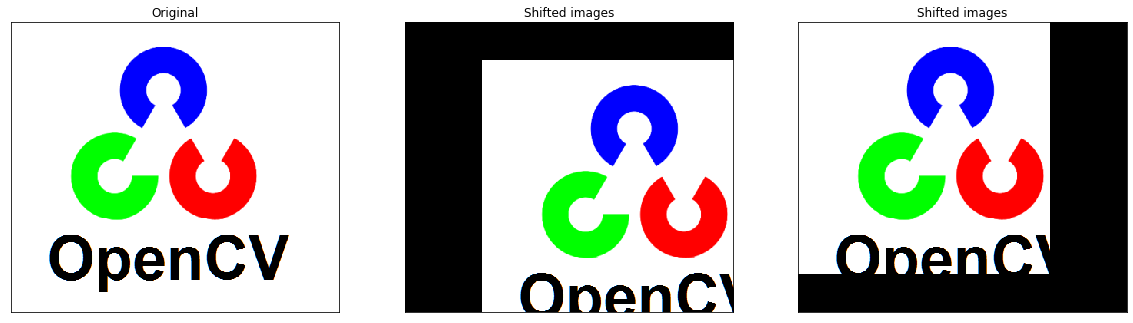

In [21]:
img = cv2.imread('imgs/opencv_logo1.png', 1)
rows,cols,_ = img.shape
M = np.float32([[1,0,100],[0,1,50]]) # Shift right by 100 and down by 50
dst = cv2.warpAffine(img,M,(cols,rows))

################################################################################
# TO DO: Observed that the bottom right of 'dst' image is lost. Modifying the
# following codeline so as to the 'res' image is fully shown.
################################################################################
res = cv2.warpAffine(img,M,(cols,rows))
N = np.float32([[1,0,-100],[0,1,-50]])
res = cv2.warpAffine(res,N,(cols,rows))
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

plt.figure(figsize=(20,10))
plt.subplot(131),plt.imshow(img),
plt.title('Original'),plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(dst),
plt.title('Shifted images'),plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(res),
plt.title('Shifted images'),plt.xticks([]), plt.yticks([])
plt.show()

## Rotation
Calculates an affine matrix of 2D rotation using [cv2.getRotationMatrix2D()](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/geometric_transformations.html?highlight=cv2.getrotationmatrix2d#cv2.getRotationMatrix2D).
 * 1st argument: center
 * 2nd argument: angle (in degree)
 * 3rd argument: scale

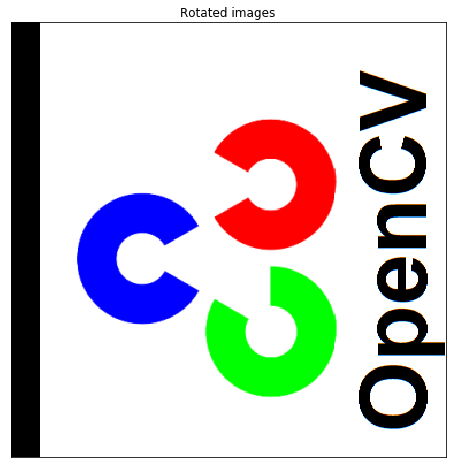

In [22]:
img = cv2.imread('imgs/opencv_logo1.png', 1)
H,W,_ = img.shape
################################################################################
# TO DO: Run the code to observe the output image.
# Modifying the code below so as to the 'dst' image has no black padding.
################################################################################
M = cv2.getRotationMatrix2D((W/2,H/2),90,1)

dst = cv2.warpAffine(img,M,(W-50,H))

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

plt.imshow(dst),
plt.title('Rotated images'),plt.xticks([]), plt.yticks([])
plt.show()

# Changing color space - Grayscale
Grayscale values is converted from RGB values by a weighted sum of the R, G, and B components:

$$0.2989 \times R + 0.5870 \times G + 0.1140 \times B $$

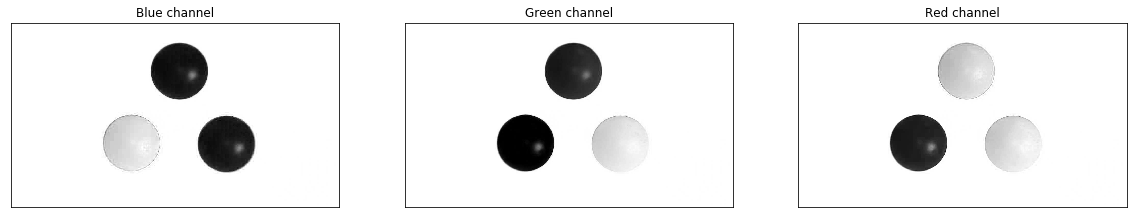

In [23]:
# Split channels
img = cv2.imread('imgs/balls.jpg', 1)

plt.figure(figsize=(20,10))
plt.subplot(131),plt.imshow(img[:,:,0], cmap='gray'),
plt.title('Blue channel'),plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img[:,:,1], cmap='gray'),
plt.title('Green channel'),plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img[:,:,2], cmap='gray'),
plt.title('Red channel'),plt.xticks([]), plt.yticks([])
plt.show()

In [24]:
def rgb2gray(img):
    """
    A implementation of the method that converts BGR image to grayscale image of 
    uint8 data type.
    """
    b, g, r = img[:,:,0], img[:,:,1], img[:,:,2]
    out = np.round(0.2989 * r + 0.5870 * g + 0.1140 * b,0)
    out = out.astype('int')

    ################################################################################
    # TO DO: Implement the method to convert BGR image to Grayscale image.         #
    # Hint: Remember to round and convert the values to nearest uint8 values.      #
    ################################################################################
    pass
    ################################################################################
    #                                 END OF YOUR CODE                             #
    ################################################################################
    
    return out

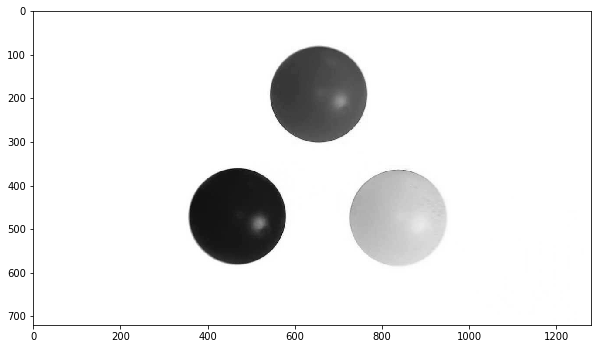

In [25]:
img = cv2.imread('imgs/balls.jpg', 1)

out = rgb2gray(img)
plt.imshow(out)

Run the following code section to compare your implementation of the `rgb2gray` function with OpenCV built-in function [cv2.cvtColor](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/miscellaneous_transformations.html?highlight=cv2.cvtcolor#cv2.cvtColor).

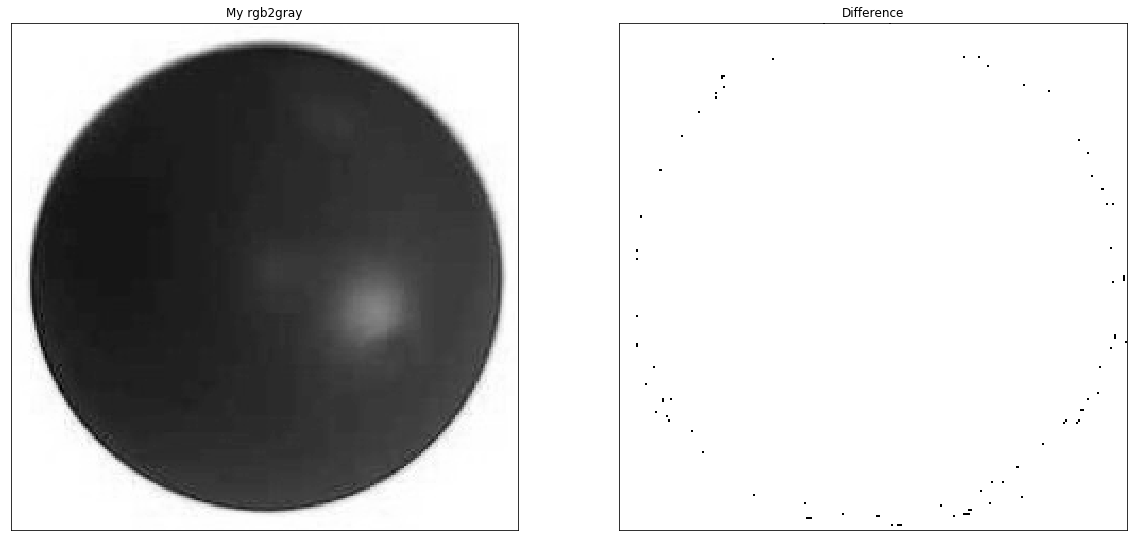

Testing rgb2gray
Number of difference pixel is 82


In [26]:
img = cv2.imread('imgs/ball_red.jpg', 1)
img_gray1 = rgb2gray(img)
img_gray2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(img_gray1, cmap='gray'),
plt.title('My rgb2gray'),plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_gray1 - img_gray2, cmap='gray'),
plt.title('Difference'),plt.xticks([]), plt.yticks([])
plt.show()


# Check your output: count 
print('Testing rgb2gray')
print('Number of difference pixel is %d' % np.count_nonzero(img_gray1 - img_gray2))

**Question:** Does your implementation of `rgb2gray` function give the result that is exactly the same as OpenCV built-in function? Why?

**Your answer:** fill in here

# Changing color space - Detect object by color. 
By converting BGR image to HSV, we can use this to extract a colored object. In HSV, it is more easier to represent a color than RGB color-space. In this exercise, we will try to extract blue, red, and yellow colored objects. So here is the method:

 * Take each frame of the video
 * Convert from BGR to HSV color-space 
 * We threshold the HSV image for a range of blue color
 * Now extract the blue object alone, we can do whatever on that image we want.

In [27]:
# Get list of available flags
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print(flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_

[[[  0 255 255]]]
[[[ 28 201 235]]]


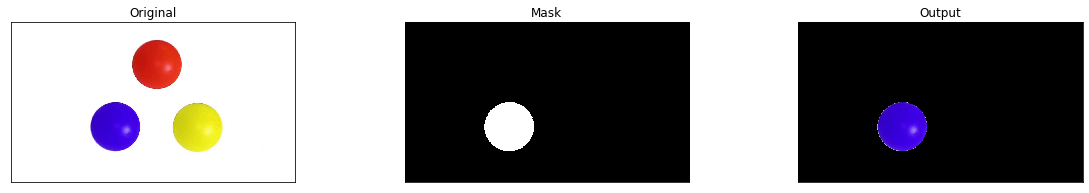

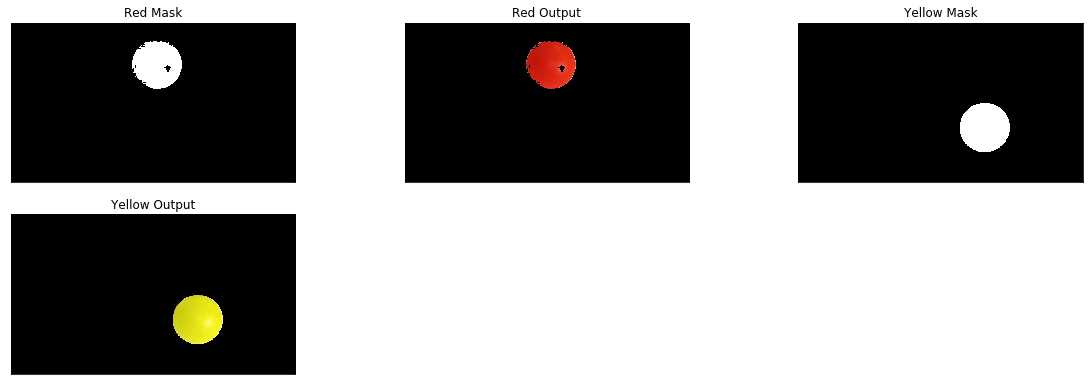

In [28]:
frame = cv2.imread('imgs/balls.jpg', 1)

# Convert BGR to RGB, now you will see the color of 'frame' image
# is displayed properly.
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Convert BGR to HSV
hsv = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)

# define range of blue color in HSV
lower_blue = np.array([110,50,50])
upper_blue = np.array([130,255,255])

# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Bitwise-AND mask and original image
res = cv2.bitwise_and(frame,frame, mask= mask)

################################################################################
# TO DO: Implement masks for red and yellow balls. 
################################################################################
red = np.uint8([[[0,0,255 ]]])
hsv_red = cv2.cvtColor(red,cv2.COLOR_BGR2HSV)

print(hsv_red)
lower_red = np.array([0,50,50])
upper_red = np.array([10,255,255])
mask_red = cv2.inRange(hsv,lower_red,upper_red)
#mask_red = cv2.inRange(hsv_red,lower_red,upper_red)
res_red = cv2.bitwise_and(frame,frame,mask=mask_red)


#yellow
yellow = np.uint8([[[50,225,235]]])
hsv_yellow = cv2.cvtColor(yellow,cv2.COLOR_BGR2HSV)
lower_yellow = np.array([18,50,50])
upper_yellow = np.array([38,255,255])
mask_yel = cv2.inRange(hsv,lower_yellow,upper_yellow)
res_yellow = cv2.bitwise_and(frame,frame,mask=mask_yel)
print(hsv_yellow)
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

plt.figure(figsize=(20,10))
plt.subplot(331),plt.imshow(frame),
plt.title('Original'),plt.xticks([]), plt.yticks([])
plt.subplot(332),plt.imshow(mask, cmap='gray'),
plt.title('Mask'),plt.xticks([]), plt.yticks([])
plt.subplot(333),plt.imshow(res),
plt.title('Output'),plt.xticks([]), plt.yticks([])
plt.show()
plt.figure(figsize=(20,10))
plt.subplot(334),plt.imshow(mask_red, cmap='gray'),
plt.title('Red Mask'),plt.xticks([]), plt.yticks([])
plt.subplot(335),plt.imshow(res_red),
plt.title('Red Output'),plt.xticks([]), plt.yticks([])
plt.subplot(336),plt.imshow(mask_yel, cmap='gray'),
plt.title('Yellow Mask'),plt.xticks([]), plt.yticks([])
plt.subplot(337),plt.imshow(res_yellow),
plt.title('Yellow Output'),plt.xticks([]), plt.yticks([])
plt.show()

# 2D Convolution ( Image Filtering )

OpenCV provides a function, [cv2.filter2D](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/filtering.html?highlight=cv2.filter2d#cv2.filter2D), to convolve a kernel with an image.
 
 

In [29]:
def convolution_naive(x, F, conv_param):
    """
    A naive implementation of a convolutional filter.
    
    The input consists of a gray scale image x (1 channel) with height H and width
    W. We convolve each input with filter F, which has height HH and width HH.
    
    Input:
    - x: Input data of shape (H, W)
    - F: Filter weights of shape (HH, WW)
    - conv_param: A dictionary with the following keys:
      - 'stride': The number of pixels between adjacent receptive fields in the
        horizontal and vertical directions.
      - 'pad': The number of pixels that will be used to zero-pad the input.
    
    Return:
    - out: Output data, of shape (H', W') where H' and W' are given by
      H' = 1 + (H + 2 * pad - HH) / stride
      W' = 1 + (W + 2 * pad - WW) / stride
    """
    
    stride = conv_param['stride']
    pad = conv_param['pad']
    H, W = x.shape
    HH, WW = F.shape
    H_prime = int(1 + (H + 2 * pad - HH) / stride)
    W_prime = int(1 + (W + 2 * pad - WW) / stride)
    x_pad = np.lib.pad(x, ((pad, pad), (pad, pad)),\
                            'constant', constant_values=(0))
    out = np.zeros((H_prime, W_prime), dtype=x.dtype)
    print(x_pad.shape)
    #############################################################################
    # TODO: Implement the convolutional forward pass.                           #
    # Hint: Using 2 nested for-loop to calculate each pixel of the output image.#
    #############################################################################
    for y in range(pad, pad+H):
        for x_coor in range(pad,pad+W):
            roi = x_pad[y - pad:y + pad + 1, x_coor - pad:x_coor + pad + 1]
            k = (roi * F).sum()
            out[y - pad, x_coor - pad] = k
    pass
    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################
    return out

Run the following code section to test your implementation of the `convolution_naive` function

In [30]:
x_shape = (5, 5)
F_shape = (3, 3)
x = np.linspace(-0.1, 0.5, num=np.prod(x_shape)).reshape(x_shape)
F = np.linspace(-0.2, 0.3, num=np.prod(F_shape)).reshape(F_shape)
conv_param = {'stride': 1, 'pad': 1}

out = convolution_naive(x, F, conv_param)
correct_out = np.array( [[ 0.0075,     0.030625,   0.0521875,  0.07375,    0.0475   ],
                         [ 0.114375,   0.1725,     0.18375,    0.195,      0.10875  ],
                         [ 0.1753125,  0.22875,    0.24,       0.25125,    0.1228125],
                         [ 0.23625,    0.285,      0.29625,    0.3075,     0.136875 ],
                         [ 0.0075,    -0.05375,   -0.0603125, -0.066875,  -0.1025   ]])
# print(correct_out.shape)
# print(out)

# Compare your output to ours; difference should be very small
print('Testing convolution_naive')
print('difference: ', rel_error(out, correct_out))

(7, 7)
Testing convolution_naive
difference:  0.0


In [31]:
# List of available BORDER effect
flags = [i for i in dir(cv2) if i.startswith('BORDER_')]
print(flags)

['BORDER_CONSTANT', 'BORDER_DEFAULT', 'BORDER_ISOLATED', 'BORDER_REFLECT', 'BORDER_REFLECT101', 'BORDER_REFLECT_101', 'BORDER_REPLICATE', 'BORDER_TRANSPARENT', 'BORDER_WRAP']


## Averaging filter
This is done by convolving image with a normalized box filter. A $5\times 5$ normalized box filter would look like below:
$$K = \frac{1}{25} \begin{bmatrix} 1&1&1&1&1 \\ 1&1&1&1&1 \\ 1&1&1&1&1 \\ 1&1&1&1&1 \\1&1&1&1&1 \end{bmatrix}$$

Testing convolution_naive
difference:  0.0035056125


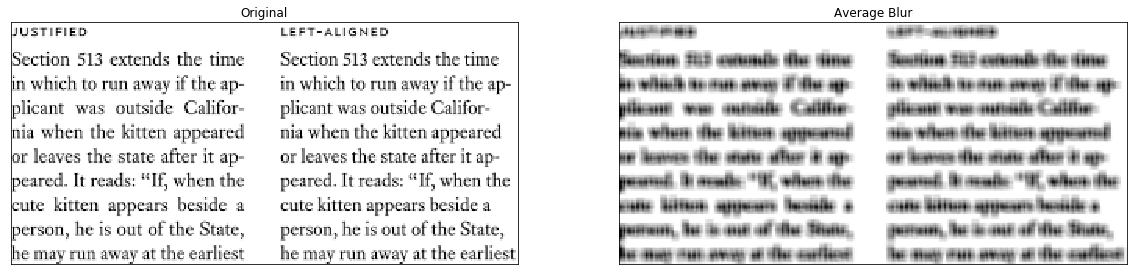

In [32]:
# Convert image data type from uint8 to float32.
img = cv2.imread('imgs/text.png', 1).astype(np.float32)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

kernel = np.zeros((5,5), np.float32)
################################################################################
# TODO: Create a 5x5 kernel as K shown above.                                  #
################################################################################
K = np.ones((5,5),np.float32)/25
pass
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################
blur_2dfilter = cv2.filter2D(img,-1,K)

# The above codes can be replaced by the following code line.
blur = cv2.blur(img,(5,5))

# Check your output; difference should be around 4e-3
print('Testing convolution_naive')
print('difference: ', rel_error(blur_2dfilter, blur))


# Visualize the output image
plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(img, cmap='gray'),
plt.title('Original'),plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur, cmap='gray'),
plt.title('Average Blur'),plt.xticks([]), plt.yticks([])
plt.show()

## Gaussian Blurring
Here is the 1D Gaussian distribution:
$$G(x)=\frac{1}{\sigma\sqrt{2\pi} }\exp{\left(-\frac{x^2}{\sigma^2}\right)}$$

![1D Gaussian](imgs/Smoothing_Tutorial_theory_gaussian_0.jpg "1D Gaussian")

Similarly, we have 2D Gaussian distribution.
$$G(x,y)=\frac{1}{2\pi \sigma^2}\exp{\left(-\frac{x^2+y^2}{\sigma^2}\right)}$$
The nearest neighboring pixels have the most influence.
![2D Gaussian](imgs/gaussian_2d.gif "2D Gaussian")

Testing convolution_naive
difference:  0.0042602094


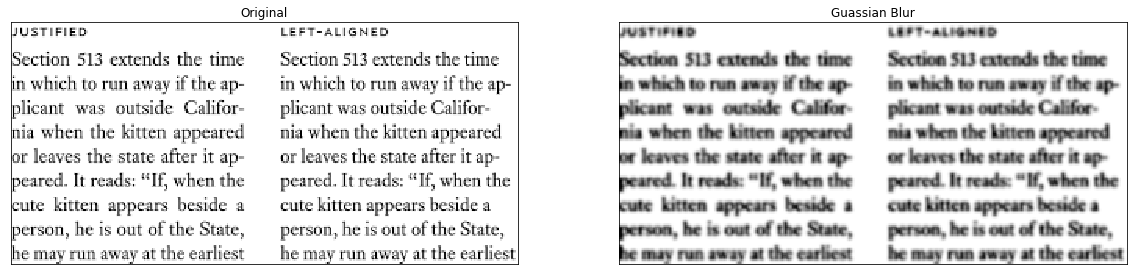

In [33]:
img = cv2.imread('imgs/text.png', 1).astype(np.float32)/255.0
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gaussian_kernel_XY = np.zeros((5,5), np.float32)
################################################################################
# TODO: Create a 5x5 kernel, 'gaussian_kernel_XY', which approximates the 
# Gaussian function with sigma=1. 
# Hint: + You should NOT munually create the kernel.  
#       + Use the 'cv2.getGaussianKernel' function to create 1D Guassian kernel.
#       + Use the associative property of convolution to create 2D Gaussian. A
# useful reference: https://blogs.mathworks.com/steve/2006/10/04/separable-convolution/
################################################################################
gauss_x = cv2.getGaussianKernel(5,1)
gauss_y = np.transpose(gauss_x)
gaussian_kernel_XY = np.dot(gauss_x,gauss_y)
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################
blur_2dfilter = cv2.filter2D(img,-1,gaussian_kernel_XY)

# The above codes can be replaced by the following code line.
blur = cv2.GaussianBlur(img,(5,5),1)

# Check your output; difference should be around 4e-3
print('Testing convolution_naive')
print('difference: ', rel_error(blur_2dfilter, blur))

# Visualize the output image
plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(img, cmap='gray'),
plt.title('Original'),plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur, cmap='gray'),
plt.title('Guassian Blur'),plt.xticks([]), plt.yticks([])
plt.show()

**QUESTION:** Provide your comments on the outputs of *a average filter* and *a Gaussian filter*? Which one is more preferable?

**Your answer:** fill in here

## Median Filter

Example: 
 * **Odd** number of elements: $X=[2, 5, 1, 0, 9]\to X_{sorted}=[0,1,2,5,9]\Rightarrow \text{median}=2$
 * **Even** number of elements: 
    * Option 1: $X=[5, 1, 0, 9]\to X_{sorted}=[0,1,5,9]\Rightarrow \text{median}=1$
    * Option 2: $X=[5, 1, 0, 9]\to X_{sorted}=[0,1,5,9]\Rightarrow \text{median}=(1+5)/2=3$

In [34]:
# Implement a function to find median value with `option 1`.
import math
def findMedian(x):
    out = 0
    #############################################################################
    # TODO: Implement the function to find median value of array x.             #
    # NOTE: You should see that the `median' numpy built-in function is based   #
    # on option 2.
    #############################################################################
    flat = np.array(x).flatten()
    sort = sorted(flat)
    if len(sort)%2 == 0:
        out = sort[(len(sort)//2)-1]
    else:
        out = sort[math.floor(len(sort)/2)]
    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################
    return float(out)

In [35]:
print ('Numpy median: ', np.median([[5,1],[0,9]]))
print ('Numpy median: ', np.median([2,5,1,0,9]))
print ('findMedian: ', findMedian([[5,1],[0,9]]))
print ('findMedian: ', findMedian([2,5,1,0,9]))

Numpy median:  3.0
Numpy median:  2.0
findMedian:  1.0
findMedian:  2.0


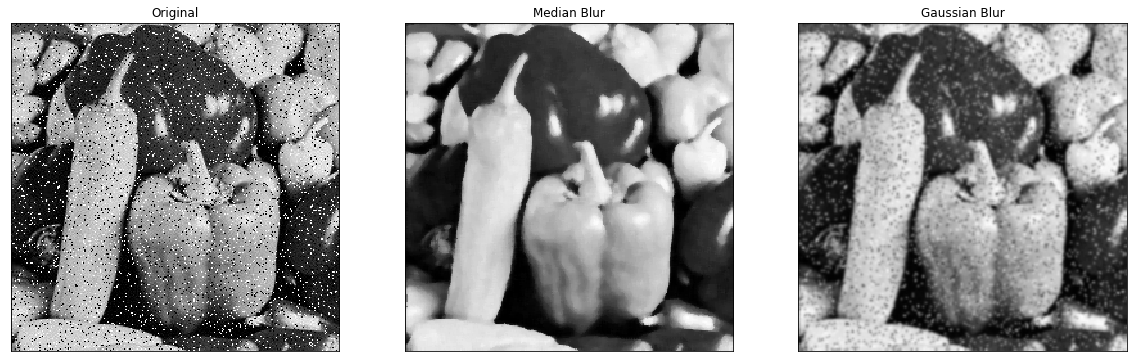

In [36]:
img = cv2.imread('imgs/SaltAndPepperNoise.jpg', 0)
median = cv2.medianBlur(img,5)
gau_blur = cv2.GaussianBlur(img,(5,5),1)

plt.figure(figsize=(20,10))
plt.subplot(131),plt.imshow(img, 'gray')
plt.title('Original'),plt.xticks([]),plt.yticks([])
plt.subplot(132),plt.imshow(median, 'gray')
plt.title('Median Blur'),plt.xticks([]),plt.yticks([])
plt.subplot(133),plt.imshow(gau_blur, 'gray')
plt.title('Gaussian Blur'),plt.xticks([]),plt.yticks([])
plt.show()

**QUESTION:** Provide your comments on the effectiveness of *a median filter* and *a Gaussian filter* for the example above? Explain why? 

**Your answer:** fill in here

In [37]:
def myMedianBlur(img, size):
    """
    A implementation of median blur filter.
    """
    out = img.copy()
    W,H = img.shape[0],img.shape[1]
    s = (size - 1)/2
    #############################################################################
    # TODO: Implement the median blur.                                          #
    # NOTE: Your implementation is NOT necessary to provide the identical       #
    # output as OpenCV built-in function. However, it should be visually very   # 
    # similar.                                                                  #
    #############################################################################
    temp = []
    img_final = np.zeros((W,H))
    for i in range(W):
        for j in range(H):
            for k in range(size):
                if i + k - size < 0 or i + k - size > W - 1: #checking for boundaries
                    for l in range(size):
                        temp.append(0)
                else:
                    if j + k - size < 0 or j + size > H - 1: #checking for boundaries
                        temp.append(0)
                    else:
                        for l in range(size):
                            temp.append(out[i + k - size][j + l - size])

            temp.sort()
            img_final[i][j] = temp[len(temp) // 2]
            temp = []

    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################
    return out

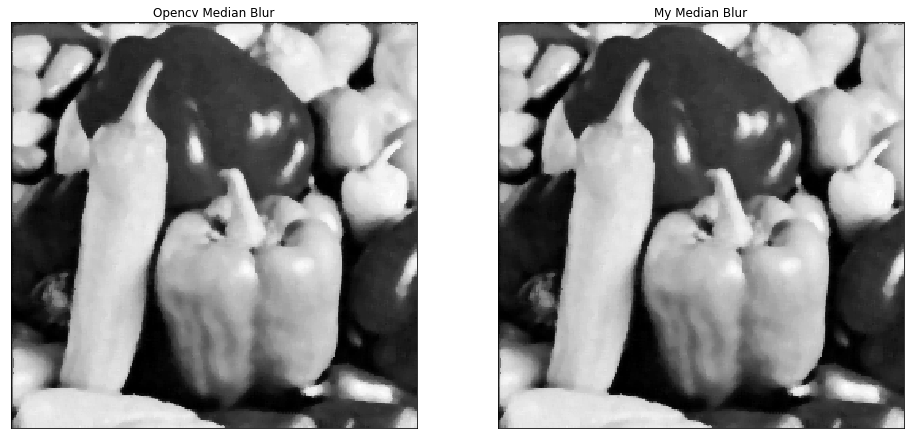

In [38]:
img = cv2.imread('imgs/SaltAndPepperNoise.jpg', 0)
mymedian = myMedianBlur(img,5)
median = cv2.medianBlur(img,5)

# Note that your implementation is NOT necessary to provide 
# the identical output as OpenCV built-in function. However,
# it should visually very similar.
plt.figure(figsize=(16,8))
plt.subplot(121),plt.imshow(median, 'gray')
plt.title('Opencv Median Blur'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(median, 'gray')
plt.title('My Median Blur'),plt.xticks([]),plt.yticks([])
plt.show()

# Image gradient
For 1-D continuous function $f(x)$, the gradient is given as:
$$D_x[f(x)]=\frac{d}{dx}f(x)=\lim\limits_{\Delta x\to 0}\frac{f(x+\Delta x)-f(x)}{\Delta x},\quad\text{or}\quad \lim\limits_{\Delta x\to 0}\frac{f(x+\Delta x)-f(x-\Delta x)}{2\Delta x}$$ 

For 1-D discrete function $f[n]$, the gradient becomes difference.
$$D_n[f[n]]=f[n+1]-f[n],\quad\text{ or }\quad\frac{f[n+1]-f[n-1]}{2}$$

The kernel to find gradient in 1-D discrete function is $[1, 0, -1]$. 

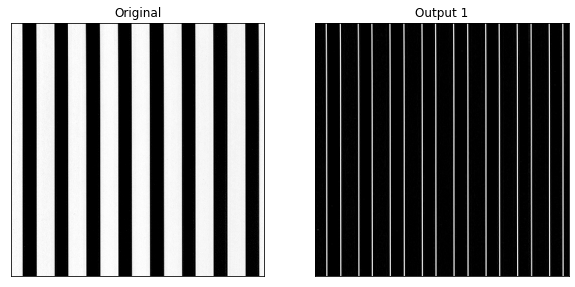

In [39]:
img = cv2.imread('imgs/banded_vertical.jpg', 0).astype(np.float32) 

#############################################################################
# TODO: Create a 3x3 kernel, Kx, to find the gradient in x-axis of an image.#
#############################################################################
kx = [[1,0,-1],[1,0,-1],[1,0,-1]]
Kx = np.array(kx)
#############################################################################
#                             END OF YOUR CODE                              #
#############################################################################
dstx = cv2.filter2D(img,-1, Kx)

plt.figure(figsize=(10,5))
plt.subplot(121),plt.imshow(img, cmap='gray')
plt.title('Original'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(np.abs(dstx), cmap='gray')
plt.title('Output 1'),plt.xticks([]),plt.yticks([])
plt.show()

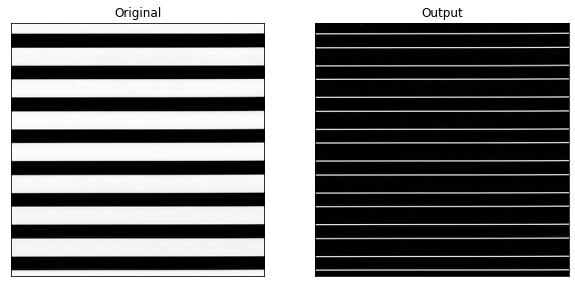

In [40]:
img = cv2.imread('imgs/banded_horizontal.jpg', 0).astype(np.float32)

#############################################################################
# TODO: Create a 3x3 kernel, Ky, to find the gradient in y-axis of an image.#
#############################################################################
ky = [[1,1,1],[0,0,0],[-1,-1,-1]]
Ky = np.array(ky)
#############################################################################
#                             END OF YOUR CODE                              #
#############################################################################
dsty = cv2.filter2D(img,-1,Ky)


plt.figure(figsize=(10,5))
plt.subplot(121),plt.imshow(img, 'gray')
plt.title('Original'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(np.abs(dsty), 'gray')
plt.title('Output'),plt.xticks([]),plt.yticks([])
plt.show()

**Question:** What do the kernel `Kx` and `Ky` do in *image processing*?

**Answer:** fill in here

### Two directions:
* Find the difference: in the two directions: 
$$g_x[m,n]=f[m+1,n]-f[m-1,n]$$

$$g_y[m,n]=f[m,n+1]-f[m,n-1]$$

* Find the magnitude and direction of the gradient vector: 
$$\|g[m,n]\|=\sqrt{g^2_x[m,n]+g^2_y[m,n]}$$

$$\measuredangle g[m,n]=\tan^{-1}\left(\frac{g_y[m,n]}{g_x[m,n]}\right)$$

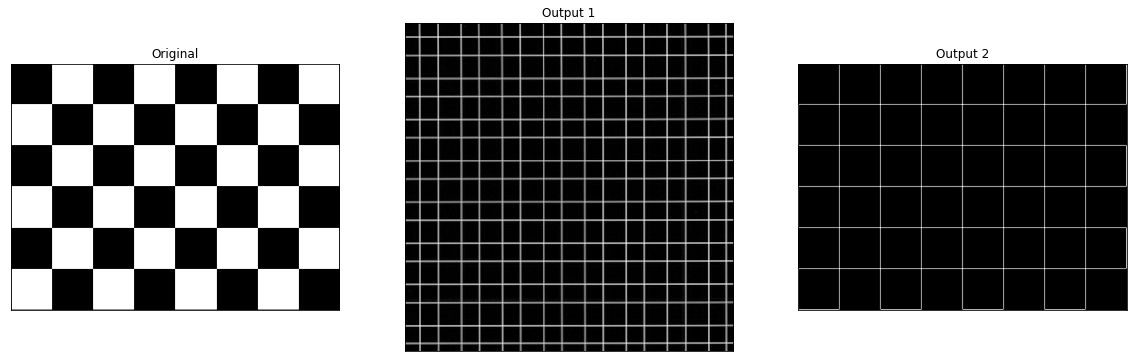

In [41]:
img = cv2.imread('imgs/chequered.jpg', 0).astype(np.float32)

#############################################################################
# TODO: Using the theory provided above, compute the magnitude of 2         # 
# direction image gradient.                                                 #
#############################################################################
dst1 = np.sqrt(np.add(np.square(dstx),np.square(dsty)))
#############################################################################
#                             END OF YOUR CODE                              #
#############################################################################

# You can achieve a similar (NOT identical) output with the following code line.
K = np.array([[0, 1,0],
              [1,-4,1],
              [0, 1,0]], dtype=np.float32)
dst2 = cv2.filter2D(img,-1,K)


plt.figure(figsize=(20,10))
plt.subplot(131),plt.imshow(img, 'gray')
plt.title('Original'),plt.xticks([]),plt.yticks([])
plt.subplot(132),plt.imshow(np.abs(dst1), 'gray')
plt.title('Output 1'),plt.xticks([]),plt.yticks([])
plt.subplot(133),plt.imshow(np.abs(dst2), 'gray')
plt.title('Output 2'),plt.xticks([]),plt.yticks([])
plt.show()

# Histogram 
 * It is a graphical representation of the intensity distribution of an image.
 * It quantifies the number of pixels for each intensity value considered.

## Histogram equilization
 * Equalization implies mapping one distribution (the given histogram) to another distribution (a wider and more uniform distribution of intensity values) so the intensity values are spreaded over the whole range.
 * To accomplish the equalization effect, the remapping should be the cumulative distribution function (cdf) (more details, refer to Learning OpenCV). For the histogram H(i), its cumulative distribution $H^{'}(i)$ is:

$$H^{'}(i) = \sum_{0 \le j < i} H(j)$$

 * To use this as a remapping function, we have to normalize $H^{'}(i)$ such that the maximum value is 255 ( or the maximum value for the intensity of the image ). From the example above, the cumulative function is:

![cumulative distribution function](imgs/Histogram_Equalization_Theory_2.jpg "Cumulative Distribution Function (cdf)")

* Finally, we use a simple remapping procedure to obtain the intensity values of the equalized image:

$$equalized( x, y ) = H^{'}( src(x,y) )$$


![Histogram Equalization](imgs/histEqualize.png "Histogram Equalization")

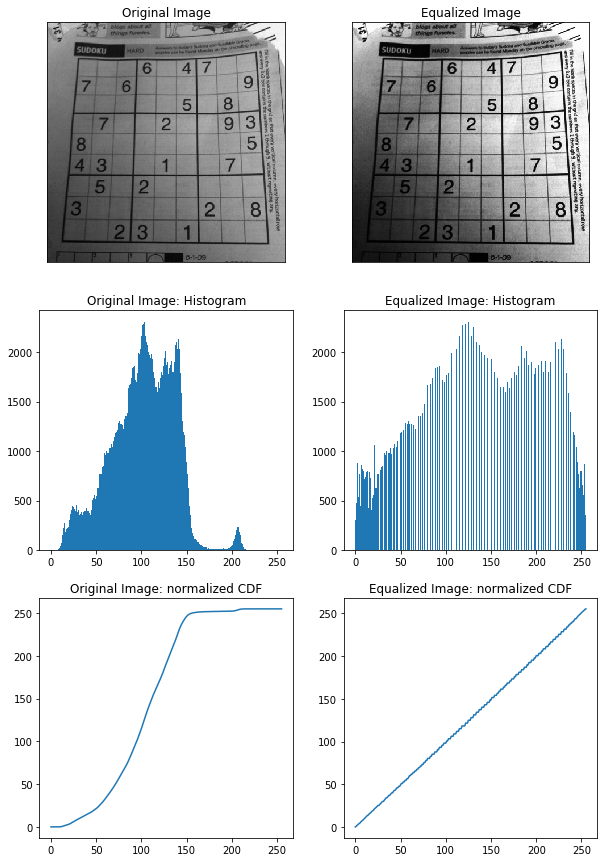

In [42]:
img = cv2.imread('imgs/sudoku-original.jpg',0)
W,H = img.shape
img_eq = cv2.equalizeHist(img)

hist = np.histogram(img, bins=256, range=(0.0, 255.0))
hist_eq = np.histogram(img_eq, bins=256, range=(0.0, 255.0))

plt.figure(figsize=(10,15))
plt.subplot(321),plt.imshow(img, cmap='gray'),plt.title('Original Image'),plt.xticks([]),plt.yticks([]) 
plt.subplot(322),plt.imshow(img_eq, cmap='gray'),plt.title('Equalized Image'),plt.xticks([]),plt.yticks([]) 
plt.subplot(323),plt.hist(img.ravel(), bins=256, range=(0.0, 255.0)),plt.title('Original Image: Histogram')
plt.subplot(324),plt.hist(img_eq.ravel(), bins=256, range=(0.0, 255.0)),plt.title('Equalized Image: Histogram')
plt.subplot(325),plt.plot(range(0,256),np.cumsum(hist[0])*255/(W*H)),plt.title('Original Image: normalized CDF')
plt.subplot(326),plt.plot(range(0,256),np.cumsum(hist_eq[0])*255/(W*H)),plt.title('Equalized Image: normalized CDF')
plt.show()

**QUIZ:** Is histogram equalization reversible?

**Your answer:** fill in here

In [43]:
def myEqualizeHist(img):
    """
    A implementation of a histogram equalization for image of `uint8` data type.
    """
    out = img
    #############################################################################
    # TODO: Implement the histogram equalization function.                      #
    #############################################################################
    out = np.array(out).flatten()
    hist = np.zeros(256)

    for i in out:
        hist[i] += 1
    sum_ = np.cumsum(hist)
    
    sum_ = ((sum_ - sum_.min()) * 255) / (sum_.max()-sum_.min())
    out = sum_[out]
    out = np.reshape(out,img.shape)
    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################
    return out

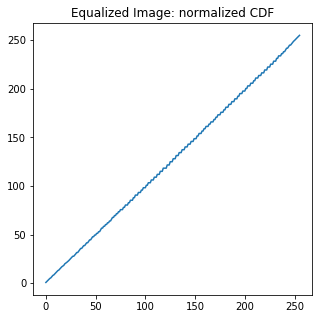

In [44]:
# Verify the correctness of your implementation by plotting the 
# normalized CDF of equalized image
img = cv2.imread('imgs/sudoku-original.jpg',0)
W,H = img.shape
img_myeq = myEqualizeHist(img)

# Your implementation may NOT need to return an image that is 
# exactly the same as the one OpenCV build-in function does. 
# However, the normalized CDF should make sense.
hist_myeq = np.histogram(img_myeq, bins=256, range=(0.0, 255.0))
plt.figure(figsize=(5,5))
plt.plot(range(0,256),np.cumsum(hist_myeq[0])*255/(W*H))
plt.title('Equalized Image: normalized CDF')
plt.show()

# Threshold
## Simple Threshold
If pixel value is greater than a threshold value, it is assigned one value (may be white), else it is assigned another value (may be black). The function used is [cv2.threshold](https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html?highlight=cv2.threshold#cv2.threshold). 

In [45]:
# Get list of available flags for thresholding styles
flags = [i for i in dir(cv2) if i.startswith('THRESH_')]
print(flags)

['THRESH_BINARY', 'THRESH_BINARY_INV', 'THRESH_MASK', 'THRESH_OTSU', 'THRESH_TOZERO', 'THRESH_TOZERO_INV', 'THRESH_TRIANGLE', 'THRESH_TRUNC']


## Adaptive Method

It decides how thresholding value is calculated. The function used is [cv2.adaptiveThreshold](https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html?highlight=cv2.adaptivethreshold#cv2.adaptiveThreshold).

 * cv2.ADAPTIVE_THRESH_MEAN_C : threshold value is the mean of neighbourhood area.
 * cv2.ADAPTIVE_THRESH_GAUSSIAN_C : threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.

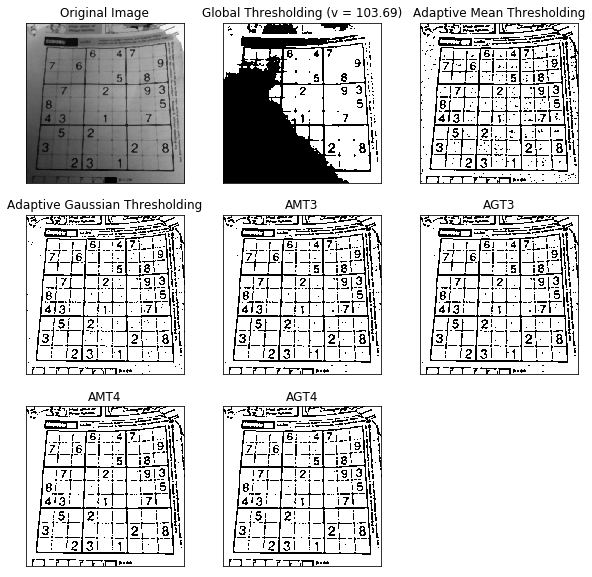

In [46]:
img = cv2.imread('imgs/sudoku-original.jpg',0)
img = cv2.medianBlur(img,5)
img_mean = np.mean(img)

C = 2
ret,th1 = cv2.threshold(img,img_mean,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,C)

th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,C)

#############################################################################
# TODO:                                                             #
# Trying several value of constant C and observing how the output           #
# thresholded images change.                                             #
#############################################################################
th4 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,3)
th5 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,3)
th6 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,4)
th7 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,4)

#############################################################################
#                             END OF YOUR CODE                              #
#############################################################################

titles = ['Original Image', 'Global Thresholding (v = {:.2f})'.format(img_mean),
        'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding','AMT3','AGT3','AMT4','AGT4']
images = [img, th1, th2, th3,th4,th5,th6,th7]

fig = plt.figure(figsize=(10, 10))
for i in range(8):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()